## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [47]:
df = pd.read_csv('D:/DS Bootcamp/Machine Learning/ML_breakout_room/Chocolate Sales.csv')
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [49]:
df.isnull().sum() / len(df) * 100

Sales Person     0.0
Country          0.0
Product          0.0
Date             0.0
Amount           0.0
Boxes Shipped    0.0
dtype: float64

## Data Anomilies Handling

**Remove `$` and `,` from amount column and change the data type to int** 

In [51]:
df['Amount'] = df['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(int)

In [69]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [72]:
for i in df:
    print(f'Total no of unique values{i}:{df[i].nunique()}')
print('==================')

for i in df:
    print(f'\n{df[i].value_counts()}')
print('==================')

for i in df:
    print(f'\n{i}:{df[i].unique()}')

Total no of unique valuesSales Person:25
Total no of unique valuesCountry:6
Total no of unique valuesProduct:22
Total no of unique valuesDate:168
Total no of unique valuesAmount:827
Total no of unique valuesBoxes Shipped:385

Sales Person
Kelci Walkden          54
Brien Boise            53
Van Tuxwell            51
Beverie Moffet         50
Dennison Crosswaite    49
Oby Sorrel             49
Ches Bonnell           48
Karlen McCaffrey       47
Gigi Bohling           47
Curtice Advani         46
Kaine Padly            45
Madelene Upcott        45
Marney O'Breen         45
Barr Faughny           43
Jehu Rudeforth         43
Roddy Speechley        43
Gunar Cockshoot        43
Mallorie Waber         41
Jan Morforth           39
Andria Kimpton         39
Husein Augar           38
Dotty Strutley         36
Wilone O'Kielt         34
Rafaelita Blaksland    34
Camilla Castle         32
Name: count, dtype: int64

Country
Australia      205
India          184
USA            179
UK             178


In [100]:
df.duplicated().sum()

0

In [75]:
num = ['Amount', 'Boxes Shipped']

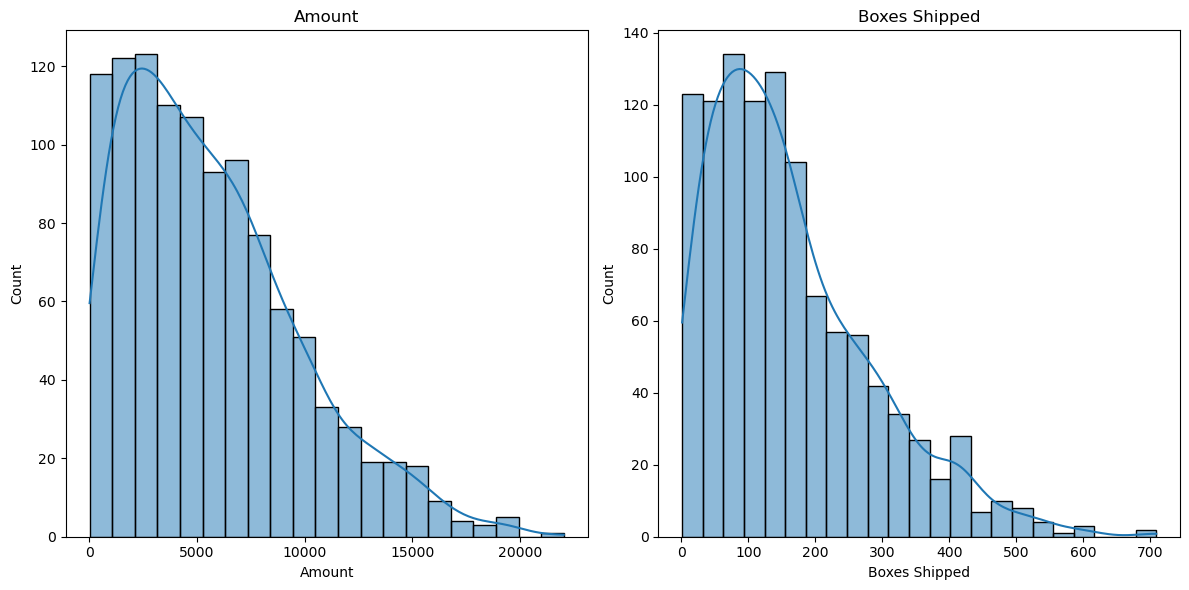

In [79]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num):
    plt.subplot(1, len(num), i + 1)
    sns.histplot(data=df, x=col, kde=True, palette='viridis')
    plt.title(col)

plt.tight_layout()  
plt.show()

In [81]:
cat = ['Sales Person', 'Country', 'Product']

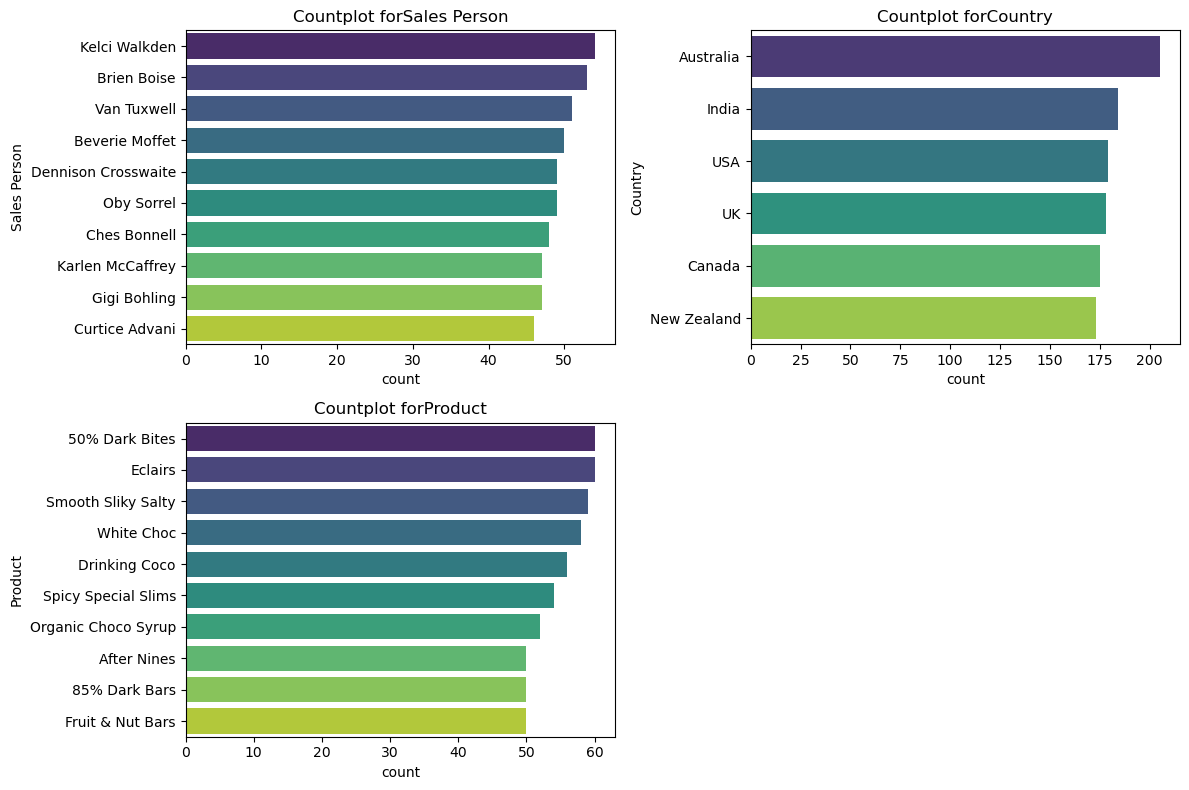

In [90]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(cat):
    plt.subplot(2, 2, i + 1)

    top_10 = df[col].value_counts().head(10)
    sns.countplot(y=col, data=df[df[col].isin(top_10.index)], order=top_10.index, palette='viridis')
    plt.title(f'Countplot for{col}')
    
plt.tight_layout()
plt.show()

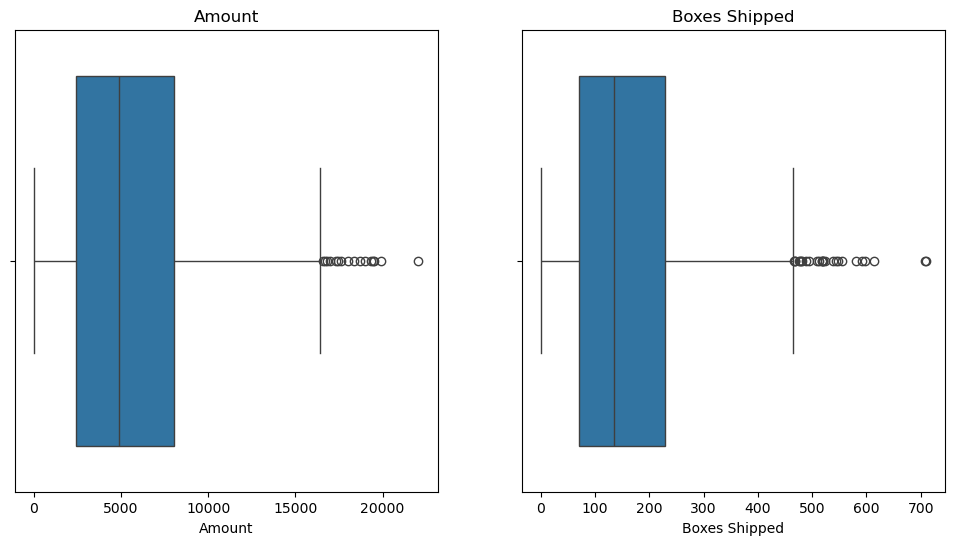

In [94]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(num):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.show()

In [101]:
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

What is the total revenue generated by each salesperson (Kelci Walkden, Brien Boise, 
and Others)? How do their performances compare? 

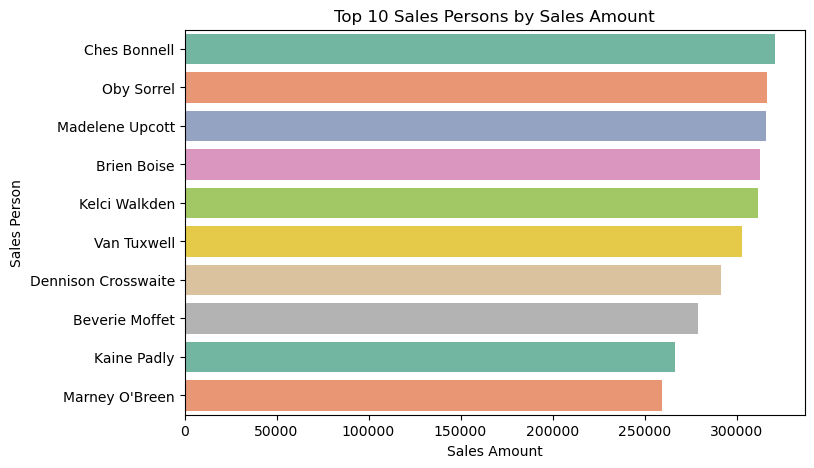

In [115]:
sale_by_person = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(y='Sales Person', x='Amount', 
            data=sale_by_person, orient='h', order=sale_by_person['Sales Person'].values, palette='Set2')
plt.title('Top 10 Sales Persons by Sales Amount')
plt.ylabel('Sales Person')
plt.xlabel('Sales Amount')
plt.show()

**Ches Bonnell generated the top revenue**

Which country (Australia, India, or Others) contributes the most to the total sales 
revenue? What percentage of the total revenue does it account for? 

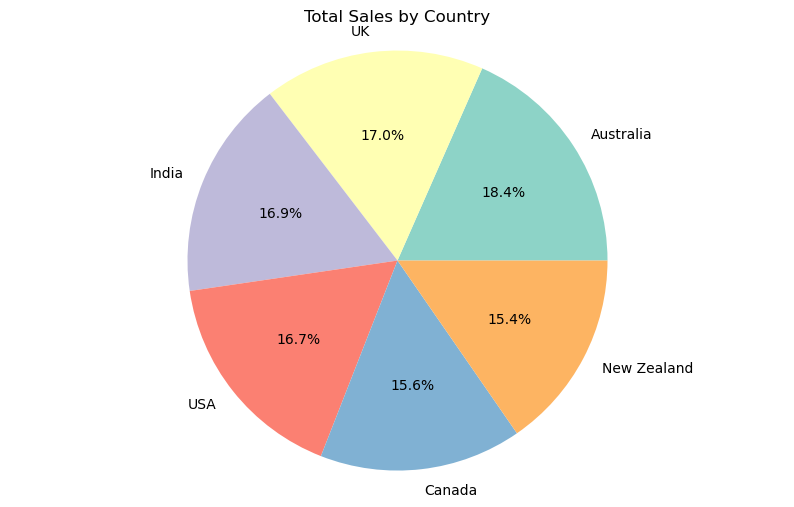

In [127]:
country_revenue = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.pie(x = country_revenue, labels=country_revenue.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Total Sales by Country')
plt.axis('equal')
plt.show()

How many unique products are sold in the dataset? Which product (e.g., 50% Dark Bites, 
Eclairs, or Others) has the highest number of transactions? 

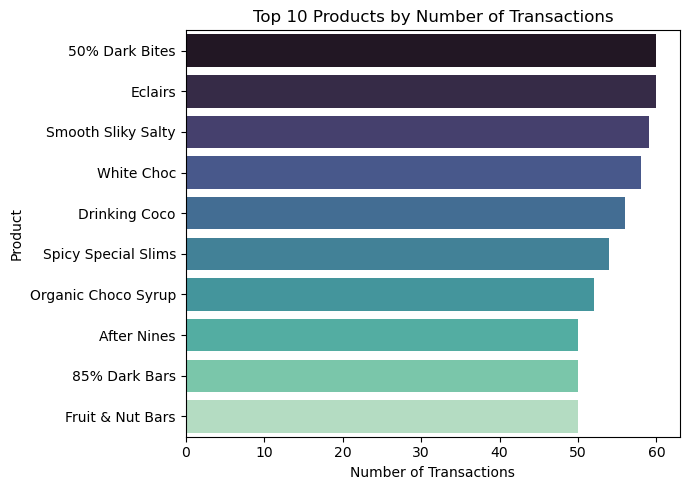

In [139]:
top_products = df['Product'].value_counts().head(10)

plt.figure(figsize=(7, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='mako')
plt.title('Top 10 Products by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

What is the trend of sales over time based on the Date column? Identify the month or 
period with the highest transaction count.

In [140]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

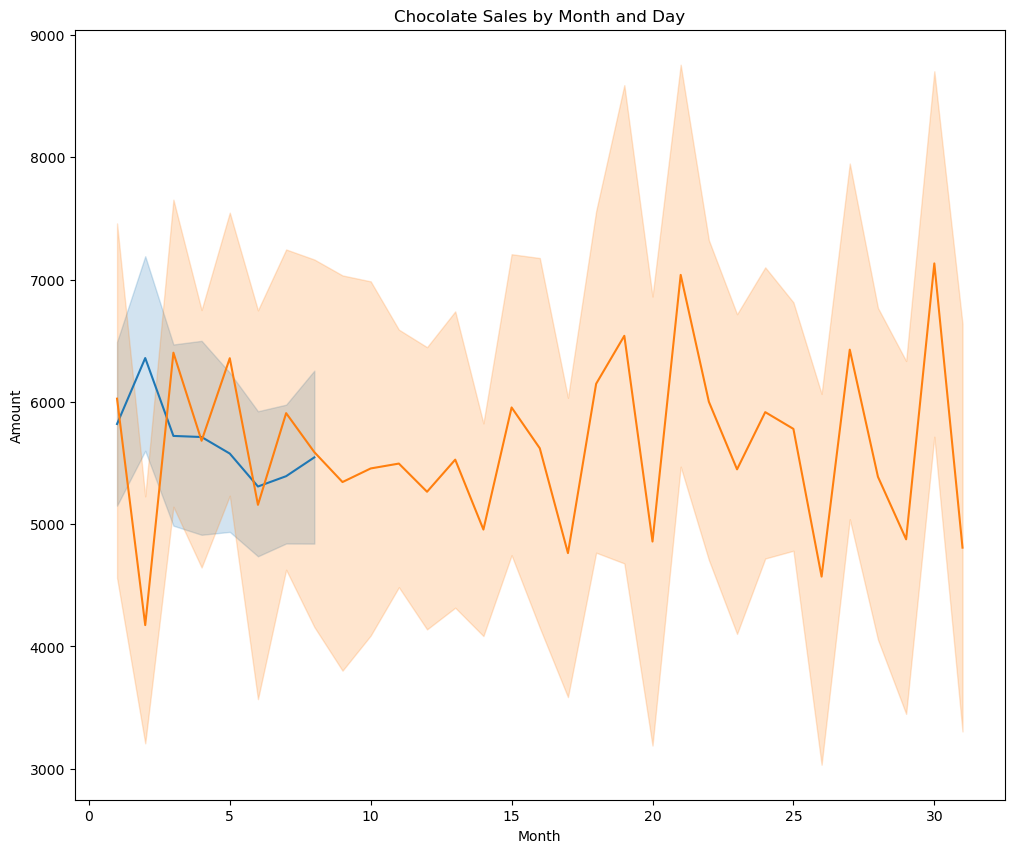

In [155]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(['Month','Day']):
    sns.lineplot(x = col, y = 'Amount', data = df)
    plt.title('Chocolate Sales by Month and Day')
plt.show()
